In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# About
This notebook is intended to introduce you to using python to simulate random processes and visualizing results.

# Gaussian Distribution
Let's say we want to simulate random values drawn from a Gaussian distribution. Well this is actually built right into the `numpy.random` module.

In [2]:
# Ask numpy for 1000 random numbers, drawn from a gaussian (normal) distribution
samples = np.random.randn(1000)

<IPython.core.display.Javascript object>


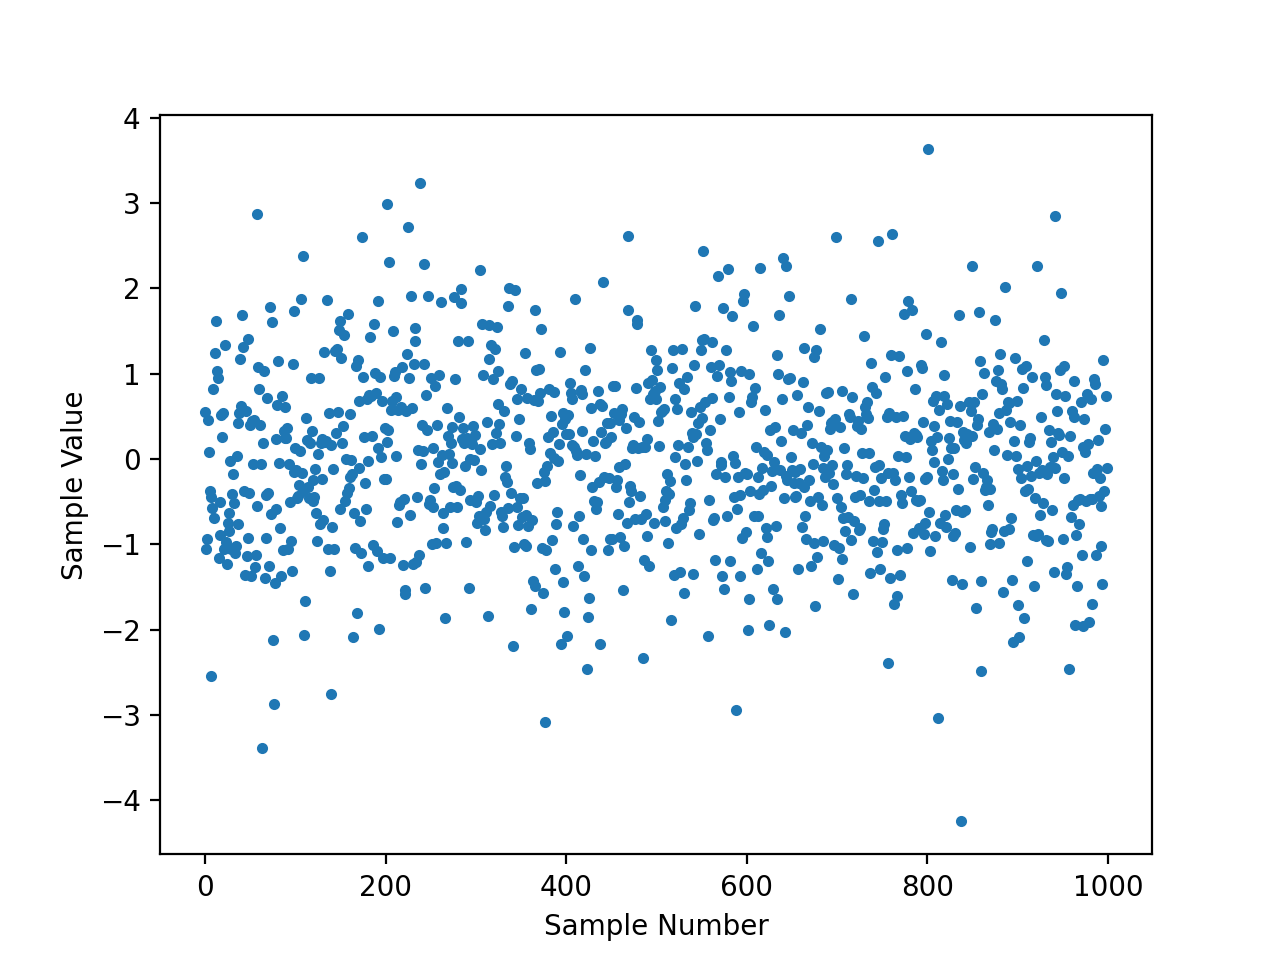

Text(0, 0.5, 'Sample Value')

In [3]:
plt.figure()
plt.plot(samples, '.')
plt.xlabel('Sample Number')
plt.ylabel('Sample Value')

Sure enough they look random. Are they gaussian? Let's plot a histogram.
And we will also plot the theoretical gaussian curve on top of it.

<IPython.core.display.Javascript object>


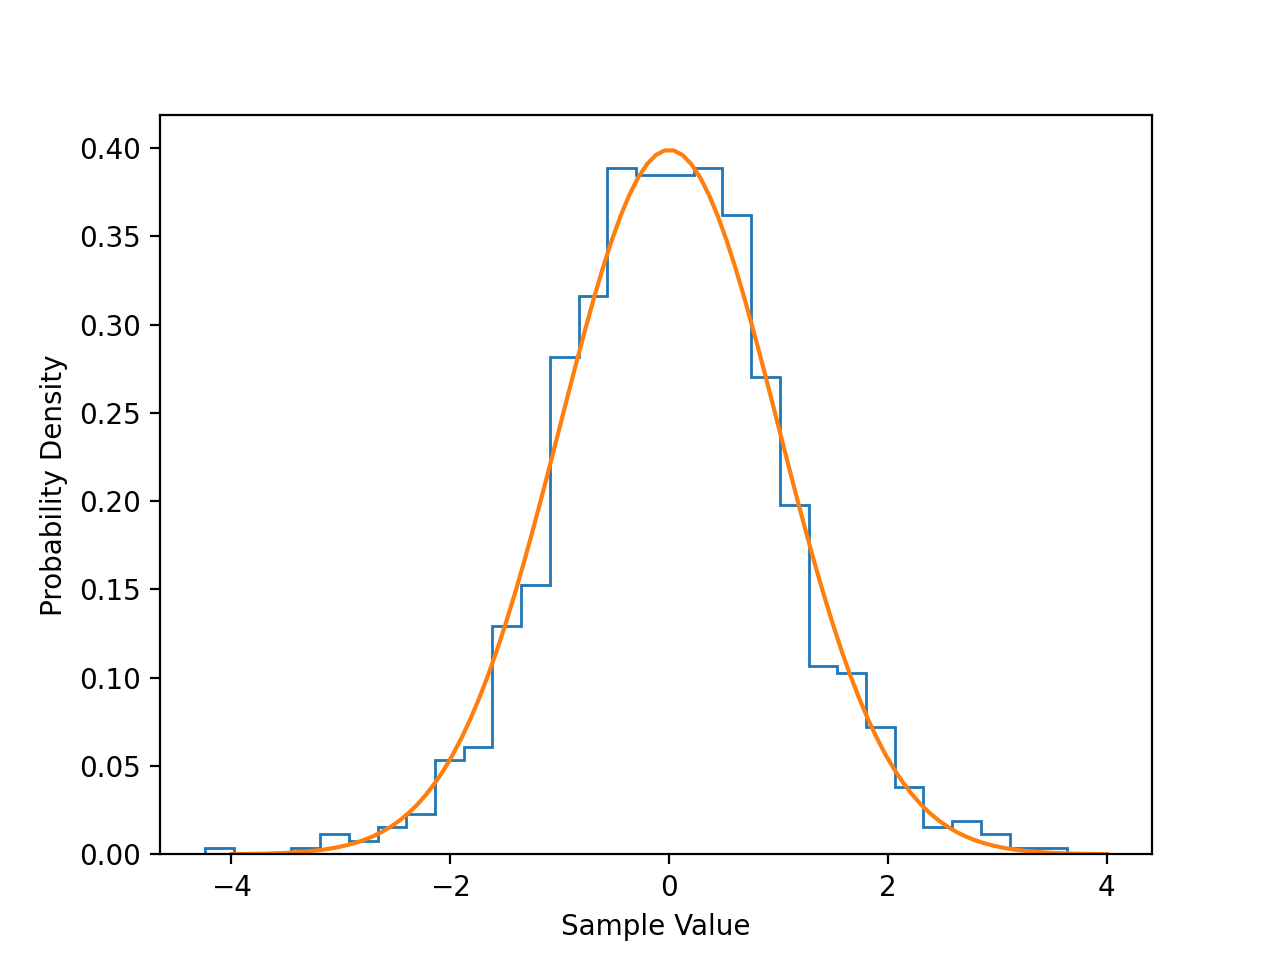

Text(0, 0.5, 'Probability Density')

In [4]:
plt.figure()
plt.hist(samples, bins=30, density=True, histtype='step')

xaxis = np.linspace(-4, 4, num=100)
yvals = np.exp(-xaxis**2 / 2) / np.sqrt(2 * np.pi)
plt.plot(xaxis, yvals)

plt.xlabel('Sample Value')
plt.ylabel('Probability Density')

## Shifting the distribution
A (normalized) gaussian has two free parameters - the width, $\sigma$, and the central value, $x_0$.
Let's draw samples from a gaussian with $\sigma=1.5$ and $x_0 = -2.0$

To do this, we scale the samples by $\sigma$ and offset them by $x_0$.

In [5]:
sigma = 1.5
x0 = -2.0
samples = sigma * np.random.randn(1000) + x0

Did we do it right? Let's check graphically and by calculating the standard deviation and average.

<IPython.core.display.Javascript object>


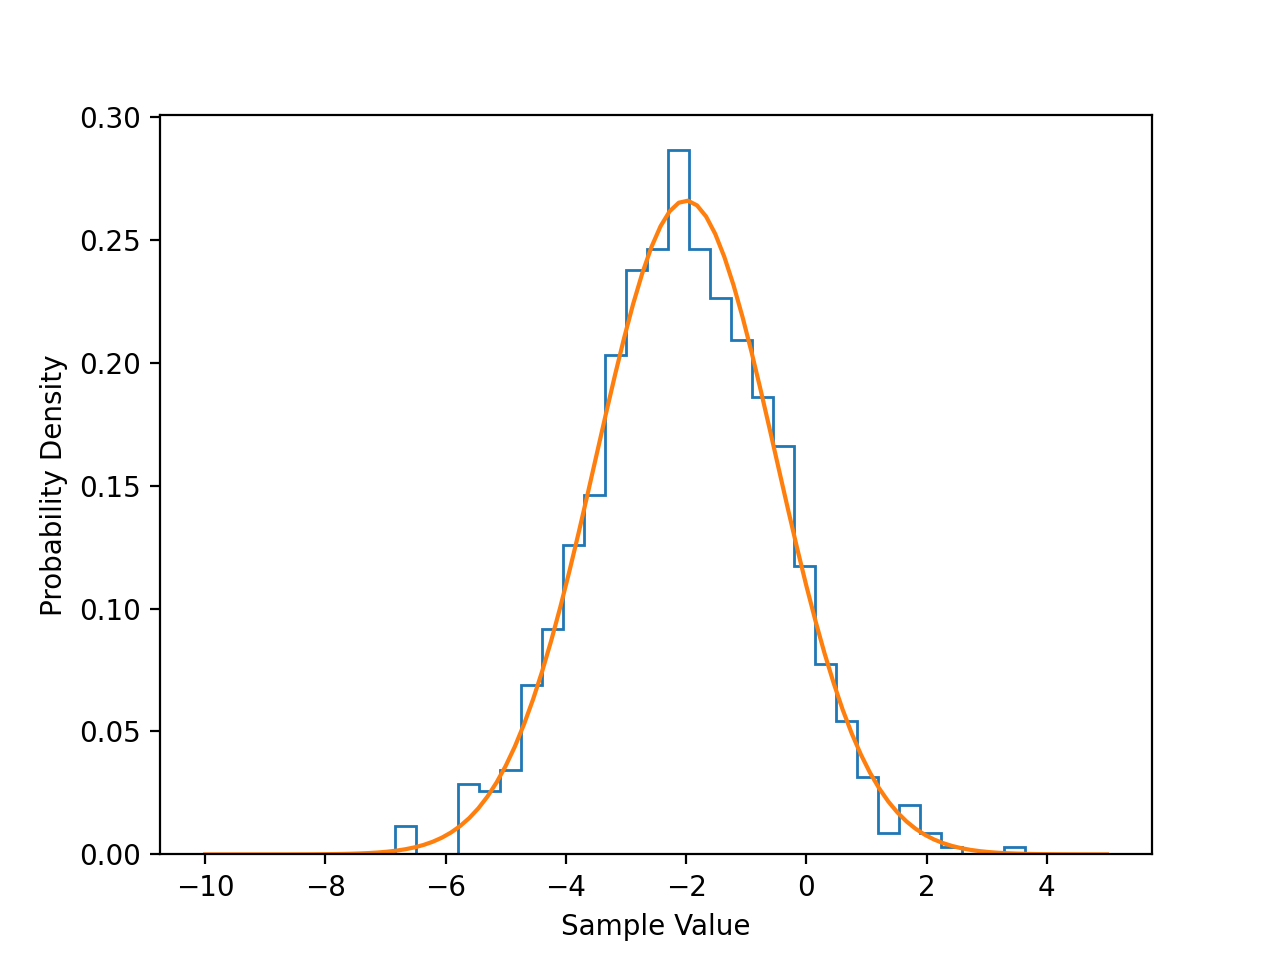

Average value = -2.0281802564397475
Standard dev. = 1.5143440719472414


In [6]:
plt.figure()
plt.hist(samples, bins=30, density=True, histtype='step')

xaxis = np.linspace(-10, 5, num=100)
yvals = np.exp(-(xaxis - x0)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
plt.plot(xaxis, yvals)

plt.xlabel('Sample Value')
plt.ylabel('Probability Density')

print(f'Average value = {np.mean(samples)}')
print(f'Standard dev. = {np.std(samples)}')

## Expectation Values
Now that we can grab samples from an arbitrary distribution, how can we calculate an expectation value?
Remember an expectation value is an average (assuming you can repeat the experiment exactly the same each time).
We can calculate an expectation value for a continuous probability function using

$$\left<f(x)\right> = \int_{-\infty}^{\infty}f(x)\rho(x)dx$$

But to simulate it, we can use our samples as a proxy for the probability density. In other words, we can apply our function to each of our samples and average that.

$$\left<f(x)\right> \approx \frac{1}{N}\sum_i f(x_i)$$

Let's use that to calculate the standard deviation manually. Recall that $\sigma^2 \equiv \left<(\Delta x)^2\right> = \left<x^2\right> - \left<x\right>^2$.

In [7]:
exp_x_sq = np.sum(samples**2) / len(samples)
exp_x = np.sum(samples) / len(samples)
std = np.sqrt(exp_x_sq - exp_x**2)
print(f'Standard dev. = {std}')

Standard dev. = 1.5143440719472412


# Uniform Distribution
We can use these ideas to check out answers for HW 1, problem 9!

I strongly recommend you attempt the problem first, but this is a nice way to check your work.

In [8]:
# Random samples between zero and pi
samples = np.pi * np.random.rand(1000)

print(f'<theta> = {np.mean(samples)}')
print(f'<theta^2> = {np.mean(samples**2)}')
print(f'sigma = {np.std(samples)}')
print('')
print(f'<sin> = {np.mean(np.sin(samples))}')
print(f'<cos> = {np.mean(np.cos(samples))}')
print(f'<cos^2> = {np.mean(np.cos(samples)**2)}')

<theta> = 1.566217758007713
<theta^2> = 3.2812116109349363
sigma = 0.9100404086831688

<sin> = 0.634774213429035
<cos> = 0.0030290821338488706
<cos^2> = 0.4993726607049345
